# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [6]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to C:\Users\Dell
[nltk_data]     XPS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [8]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [26]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q="Bitcoin AND bitcoin", language="en")
bitcoin_news["totalResults"]


4158

In [28]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q="Ethereum AND ethereum", language="en")
ethereum_news["totalResults"]

1334

In [29]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_df = pd.DataFrame.from_dict(bitcoin_news["articles"])

bitcoin_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Jonathan Shieber,Casa pivots to provide self-custody services t...,"Casa, a Colorado-based provider of bitcoin sec...",http://techcrunch.com/2020/08/06/casa-pivots-t...,https://techcrunch.com/wp-content/uploads/2019...,2020-08-06T18:25:29Z,"Casa, a Colorado-based provider of bitcoin sec..."
1,"{'id': 'engadget', 'name': 'Engadget'}",Christine Fisher,Twitter hacker was previously caught stealing ...,"Graham Ivan Clark, the 17-year-old “mastermind...",https://www.engadget.com/twitter-hacker-graham...,https://o.aolcdn.com/images/dims?resize=1200%2...,2020-08-03T14:02:34Z,"In April, the Secret Service seized 100 Bitcoi..."
2,"{'id': 'wired', 'name': 'Wired'}",Lily Hay Newman,The Quest to Liberate $300K of Bitcoin From an...,The story of a guy who wouldn't let a few quin...,https://www.wired.com/story/quest-to-liberate-...,https://media.wired.com/photos/5f2b61c651a37c3...,2020-08-06T16:16:32Z,"The question still remained, though, whether a..."
3,"{'id': None, 'name': 'Gizmodo.com'}",John Biggs,This Ransomware Stole $25 Million in 5 Months,A ransomware variant called NetWalker is doing...,https://gizmodo.com/this-ransomware-stole-25-m...,https://i.kinja-img.com/gawker-media/image/upl...,2020-08-04T20:30:00Z,A ransomware variant called NetWalker is doing...
4,"{'id': 'engadget', 'name': 'Engadget'}",Mariella Moon,FBI and CISA warn against surge in voice phish...,Authorities saw an uptick in voice phishing (o...,https://www.engadget.com/fbi-cisa-issue-voice-...,https://o.aolcdn.com/images/dims?resize=1200%2...,2020-08-23T12:19:36Z,“The COVID-19 pandemic has resulted in a mass ...


In [30]:
# Create the Ethereum sentiment scores DataFrame
ethereum_df = pd.DataFrame.from_dict(ethereum_news["articles"])

ethereum_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'mashable', 'name': 'Mashable'}",Stan Schroeder,Crypto wallet MetaMask finally launches on iOS...,If you've interacted with cryptocurrencies in ...,https://mashable.com/article/metamask-ios-andr...,https://mondrian.mashable.com/2020%252F09%252F...,2020-09-02T16:00:00Z,If you've interacted with cryptocurrencies in ...
1,"{'id': 'mashable', 'name': 'Mashable'}",Joseph Green,Master blockchain with this cheap online course,TL;DR: The Mega Blockchain Mastery Bundle is o...,https://mashable.com/uk/shopping/aug-17-mega-b...,https://mondrian.mashable.com/2020%252F08%252F...,2020-08-17T04:00:00Z,TL;DR: The Mega Blockchain Mastery Bundle is o...
2,"{'id': None, 'name': 'ReadWrite'}",Nate Nead,How to Make Your Own Crytocurrency,"Bitcoin, Ethereum, Litecoin, and a handful of ...",https://readwrite.com/2020/09/01/how-to-make-y...,https://images.readwrite.com/wp-content/upload...,2020-09-01T19:42:11Z,None
3,"{'id': 'reuters', 'name': 'Reuters'}",Tom Wilson,Boom or bust? Welcome to the freewheeling worl...,It sounds like a surefire bet. You lend money ...,https://www.reuters.com/article/us-crypto-curr...,https://s4.reutersmedia.net/resources/r/?m=02&...,2020-08-26T06:07:00Z,LONDON (Reuters) - It sounds like a surefire b...
4,"{'id': 'reuters', 'name': 'Reuters'}",Anna Irrera,ConsenSys acquires JPMorgan's blockchain platf...,Brooklyn-based technology startup ConsenSys ha...,https://www.reuters.com/article/us-jpmorgan-co...,https://s4.reutersmedia.net/resources_v2/image...,2020-08-25T13:01:00Z,NEW YORK (Reuters) - Brooklyn-based technology...


In [31]:
# Describe the Bitcoin Sentiment
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_sentiments_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_sentiments_df = bitcoin_sentiments_df[cols]

bitcoin_sentiments_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.411560,0.086450,0.005850,0.90770
std,0.225249,0.042427,0.018457,0.03952
min,-0.128000,0.000000,0.000000,0.80200
25%,0.365900,0.072000,0.000000,0.91000
50%,0.507000,0.090000,0.000000,0.91000
75%,0.507000,0.090000,0.000000,0.91425
max,0.750600,0.198000,0.071000,1.00000


In [32]:
# Describe the Ethereum Sentiment
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_sentiments_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_sentiments_df = ethereum_sentiments_df[cols]

ethereum_sentiments_df.describe()

,compound,positive,negative,neutral
count,17.000000,17.000000,17.000000,17.000000
mean,0.129412,0.062824,0.026706,0.910471
std,0.367736,0.067970,0.056512,0.091491
min,-0.599400,0.000000,0.000000,0.732000
25%,0.000000,0.000000,0.000000,0.877000
50%,0.000000,0.057000,0.000000,0.928000
75%,0.401900,0.110000,0.000000,1.000000
max,0.757900,0.209000,0.189000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [184]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, reuters
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Dell
[nltk_data]     XPS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [185]:
# Expand the default stopwords list if necessary
sw_addon = {'char', 'ul', 'li', 'tl', 'hadn\'t','fucking', 'youve'}

In [198]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words

    # Convert the words to lowercase
    
    # Remove the punctuation
    
    # Remove the stop words

    # Lemmatize Words into root words
    
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer() 
    lem = [lemmatizer.lemmatize(word) for word in words]
 
    return [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in set(stopwords.words('english'))]


In [199]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df["content"].apply(tokenizer)
bitcoin_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content,tokens
0,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Jonathan Shieber,Casa pivots to provide self-custody services t...,"Casa, a Colorado-based provider of bitcoin sec...",http://techcrunch.com/2020/08/06/casa-pivots-t...,https://techcrunch.com/wp-content/uploads/2019...,2020-08-06T18:25:29Z,"Casa, a Colorado-based provider of bitcoin sec...","[casa, coloradobased, provider, bitcoin, secur..."
1,"{'id': 'engadget', 'name': 'Engadget'}",Christine Fisher,Twitter hacker was previously caught stealing ...,"Graham Ivan Clark, the 17-year-old “mastermind...",https://www.engadget.com/twitter-hacker-graham...,https://o.aolcdn.com/images/dims?resize=1200%2...,2020-08-03T14:02:34Z,"In April, the Secret Service seized 100 Bitcoi...","[april, secret, service, seized, bitcoins, cla..."
2,"{'id': 'wired', 'name': 'Wired'}",Lily Hay Newman,The Quest to Liberate $300K of Bitcoin From an...,The story of a guy who wouldn't let a few quin...,https://www.wired.com/story/quest-to-liberate-...,https://media.wired.com/photos/5f2b61c651a37c3...,2020-08-06T16:16:32Z,"The question still remained, though, whether a...","[question, still, remained, though, whether, g..."
3,"{'id': None, 'name': 'Gizmodo.com'}",John Biggs,This Ransomware Stole $25 Million in 5 Months,A ransomware variant called NetWalker is doing...,https://gizmodo.com/this-ransomware-stole-25-m...,https://i.kinja-img.com/gawker-media/image/upl...,2020-08-04T20:30:00Z,A ransomware variant called NetWalker is doing...,"[ransomware, variant, called, netwalker, surpr..."
4,"{'id': 'engadget', 'name': 'Engadget'}",Mariella Moon,FBI and CISA warn against surge in voice phish...,Authorities saw an uptick in voice phishing (o...,https://www.engadget.com/fbi-cisa-issue-voice-...,https://o.aolcdn.com/images/dims?resize=1200%2...,2020-08-23T12:19:36Z,“The COVID-19 pandemic has resulted in a mass ...,"[covid, pandemic, resulted, mass, shift, worki..."


In [217]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df["description"].apply(tokenizer)
ethereum_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content,tokens
0,"{'id': 'mashable', 'name': 'Mashable'}",Stan Schroeder,Crypto wallet MetaMask finally launches on iOS...,If you've interacted with cryptocurrencies in ...,https://mashable.com/article/metamask-ios-andr...,https://mondrian.mashable.com/2020%252F09%252F...,2020-09-02T16:00:00Z,If you've interacted with cryptocurrencies in ...,"[youve, interacted, cryptocurrencies, past, co..."
1,"{'id': 'mashable', 'name': 'Mashable'}",Joseph Green,Master blockchain with this cheap online course,TL;DR: The Mega Blockchain Mastery Bundle is o...,https://mashable.com/uk/shopping/aug-17-mega-b...,https://mondrian.mashable.com/2020%252F08%252F...,2020-08-17T04:00:00Z,TL;DR: The Mega Blockchain Mastery Bundle is o...,"[tldr, mega, blockchain, mastery, bundle, sale..."
2,"{'id': None, 'name': 'ReadWrite'}",Nate Nead,How to Make Your Own Crytocurrency,"Bitcoin, Ethereum, Litecoin, and a handful of ...",https://readwrite.com/2020/09/01/how-to-make-y...,https://images.readwrite.com/wp-content/upload...,2020-09-01T19:42:11Z,None,"[bitcoin, ethereum, litecoin, handful, cryptoc..."
3,"{'id': 'reuters', 'name': 'Reuters'}",Tom Wilson,Boom or bust? Welcome to the freewheeling worl...,It sounds like a surefire bet. You lend money ...,https://www.reuters.com/article/us-crypto-curr...,https://s4.reutersmedia.net/resources/r/?m=02&...,2020-08-26T06:07:00Z,LONDON (Reuters) - It sounds like a surefire b...,"[sound, like, surefire, bet, lend, money, borr..."
4,"{'id': 'reuters', 'name': 'Reuters'}",Anna Irrera,ConsenSys acquires JPMorgan's blockchain platf...,Brooklyn-based technology startup ConsenSys ha...,https://www.reuters.com/article/us-jpmorgan-co...,https://s4.reutersmedia.net/resources_v2/image...,2020-08-25T13:01:00Z,NEW YORK (Reuters) - Brooklyn-based technology...,"[brooklynbased, technology, startup, consensys..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [201]:
from collections import Counter
from nltk import ngrams

In [202]:
# Generate the Bitcoin N-grams where N=2
btc_tokens = [item for sublist in bitcoin_df.tokens.to_list() for item in sublist]
btc_bigram_counts = Counter(ngrams(btc_tokens, n=2))
btc_bigram_counts.most_common(20)

[(('satoshi', 'nakaboto'), 22),
 (('char', 'robot'), 11),
 (('robot', 'colleague'), 11),
 (('colleague', 'satoshi'), 11),
 (('nakaboto', 'writes'), 11),
 (('writes', 'bitcoin'), 11),
 (('every', 'fucking'), 11),
 (('fucking', 'daywelcome'), 11),
 (('daywelcome', 'another'), 11),
 (('another', 'edition'), 11),
 (('edition', 'bitcoin'), 11),
 (('bitcoin', 'today'), 11),
 (('today', 'satoshi'), 11),
 (('nakaboto', 'tell'), 11),
 (('tell', 'whats'), 11),
 (('whats', 'going'), 11),
 (('going', 'bitcoin'), 11),
 (('bitcoin', 'char'), 11),
 (('bitcoin', 'btc'), 9),
 (('btc', 'every'), 9)]

In [203]:
# Generate the Ethereum N-grams where N=2
eth_tokens = [item for sublist in ethereum_df.tokens.to_list() for item in sublist]
eth_bigram_counts = Counter(ngrams(eth_tokens, n=2))
eth_bigram_counts.most_common(20)

[(('jpmorgan', 'chase'), 2),
 (('blockchain', 'platform'), 2),
 (('quorum', 'enterprise'), 2),
 (('enterprise', 'blockchain'), 2),
 (('bitcoin', 'scam'), 2),
 (('youve', 'interacted'), 1),
 (('interacted', 'cryptocurrencies'), 1),
 (('cryptocurrencies', 'past'), 1),
 (('past', 'couple'), 1),
 (('couple', 'year'), 1),
 (('year', 'there'), 1),
 (('there', 'good'), 1),
 (('good', 'chance'), 1),
 (('chance', 'youve'), 1),
 (('youve', 'used'), 1),
 (('used', 'metamask'), 1),
 (('metamask', 'cryptocurrency'), 1),
 (('cryptocurrency', 'wallet'), 1),
 (('wallet', 'form'), 1),
 (('form', 'browser'), 1)]

In [204]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [205]:
# Get the top 10 words for Bitcoin
token_count(btc_tokens)

[('bitcoin', 37),
 ('satoshi', 22),
 ('nakaboto', 22),
 ('char', 20),
 ('robot', 11),
 ('colleague', 11),
 ('writes', 11),
 ('every', 11),
 ('fucking', 11),
 ('daywelcome', 11)]

In [206]:
# Get the top 10 words for Ethereum
token_count(eth_tokens)

[('ethereum', 11),
 ('bitcoin', 10),
 ('cryptocurrency', 6),
 ('blockchain', 6),
 ('could', 4),
 ('price', 4),
 ('youve', 3),
 ('cryptocurrencies', 3),
 ('like', 3),
 ('chase', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [207]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

(-0.5, 399.5, 199.5, -0.5)

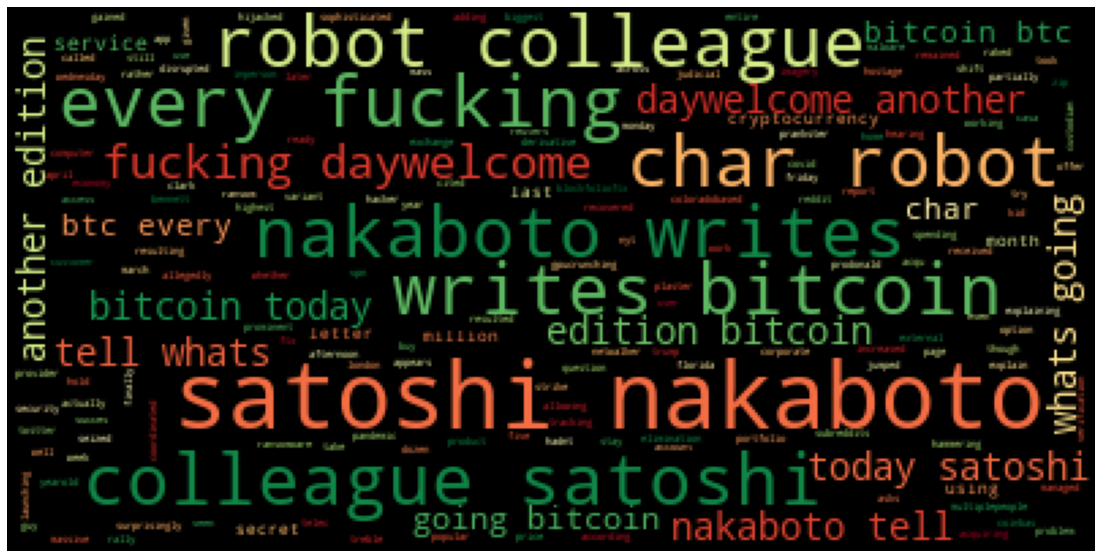

In [208]:
# Generate the Bitcoin word cloud
bitcoin_wordcloud = WordCloud(colormap="RdYlGn").generate(" ".join(btc_tokens))
plt.imshow(bitcoin_wordcloud)
plt.axis("off")


(-0.5, 399.5, 199.5, -0.5)

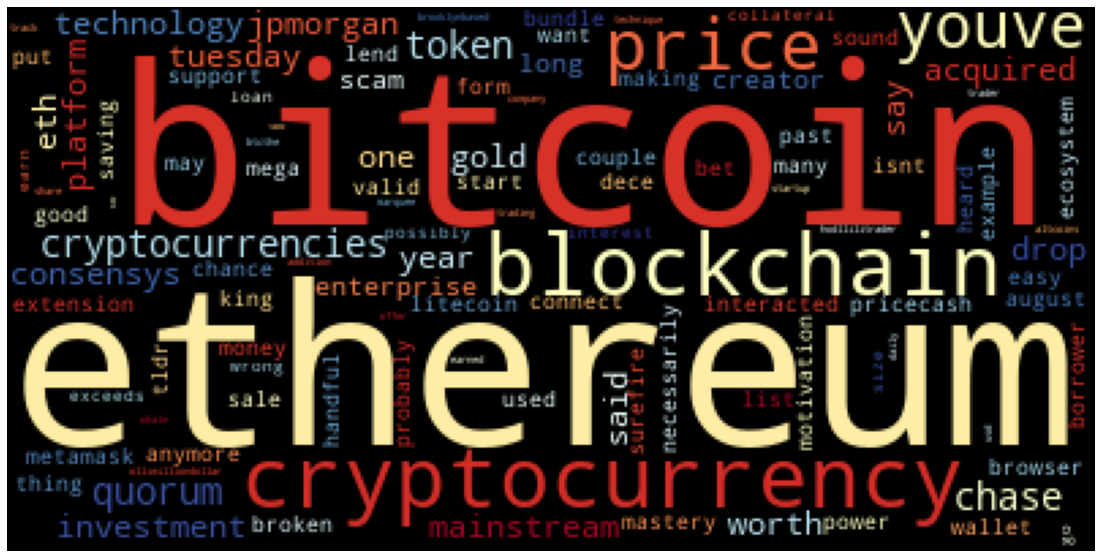

In [209]:
# Generate the Ethereum word cloud
ethereum_wordcloud = WordCloud(colormap="RdYlBu").generate(" ".join(eth_tokens))

plt.imshow(ethereum_wordcloud)
plt.axis("off")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [82]:
import spacy
from spacy import displacy

In [83]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [84]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [92]:
# Concatenate all of the Bitcoin text together
btc_text_str = " ".join(bitcoin_df.content.to_list())
print(btc_text_str)

Casa, a Colorado-based provider of bitcoin security services, is launching a managed service allowing customers to buy and hold their own bitcoin, rather than using an external custodian like Coinbas… [+1571 chars] In April, the Secret Service seized 100 Bitcoins from Clark, NYT reports. Weeks later, Bennett received a letter explaining that the Secret Service had recovered 100 of his Bitcoins. The letter cited… [+884 chars] The question still remained, though, whether all that GPU-crunching would actually work. After months of hammering on the problem, Stay was finally ready to try. The Guy hadn't given the entire ZIP f… [+2880 chars] A ransomware variant called NetWalker is doing surprisingly well, even in this economy. The malware, which takes computers hostage and asks for a Bitcoin ransom, raked in $25 million in the last five… [+1606 chars] “The COVID-19 pandemic has resulted in a mass shift to working from home, resulting in increased use of corporate VPN and elimination of in-p

In [93]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_text_str)

# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [94]:
# Render the visualization
displacy.render(btc_doc,style='ent')

In [95]:
# List all Entities
for ent in btc_doc.ents:
    print(ent.text, ent.label_)

Casa ORG
Colorado GPE
Coinbas ORG
April DATE
the Secret Service ORG
100 CARDINAL
Bitcoins ORG
Clark GPE
Weeks later DATE
Bennett PERSON
the Secret Service ORG
100 CARDINAL
months DATE
Guy PERSON
NetWalker ORG
Bitcoin GPE
$25 million MONEY
the last five DATE
VPN PRODUCT
Reddit ORG
over dozens CARDINAL
Friday DATE
afternoon TIME
pro-Donald Trump PERSON
LONDON GPE
Reuters ORG
Bitcoin GPE
over a year DATE
Monday DATE
2020 DATE
March DATE
4.4% PERCENT
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Wednesday DATE
17-year-old DATE
Florida GPE
Twitter ORG
last month DATE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto 

---

### Ethereum NER

In [97]:
# Concatenate all of the Ethereum text together
eth_text_str = " ".join(ethereum_df.description.to_list())
print(eth_text_str)

If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ethereum and its ecosystem, making it easy to connect with a dece… TL;DR: The Mega Blockchain Mastery Bundle is on sale for £29.81 as of August 17, saving you 97% on list price.

Cash isn't necessarily king anymore. You've probably heard that cryptocurrency and blockchain technologies (which power things like Bitcoin and Eth… Bitcoin, Ethereum, Litecoin, and a handful of other cryptocurrencies have broken into the mainstream, but what if you want to start a cryptocurrency of your own? There are many valid motivations for doing so. For example, you may not like how the mainstream c… It sounds like a surefire bet. You lend money to a borrower who puts up collateral that exceeds the size of the loan, and then you earn interest of about 20%. What could possibly go wrong? Brooklyn-based technology st

In [98]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text_str)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [99]:
# Render the visualization
displacy.render(eth_doc,style='ent')

In [100]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

the past couple of years DATE
29.81 MONEY
August 17 DATE
97% PERCENT
Bitcoin GPE
Eth… Bitcoin, Ethereum ORG
Litecoin PERSON
about 20% PERCENT
Brooklyn GPE
ConsenSys ORG
JPMorgan Chase & Co's ORG
Quorum PRODUCT
Tuesday DATE
ol><li PERSON
Million-Dollar MONEY
Two CARDINAL
BTC ORG
Advice ORG
Blockchain Bites: WORK_OF_ART
Michael Novogratz PERSON
Bloomberg PERSON
up to $3,000 MONEY
li PERSON
The Galaxy Digital ORG
Fed ORG
li PERSON
Novogratz PERSON
Decentralized Finance ORG
one CARDINAL
first ORDINAL
Ada Hui PERSON
thousands CARDINAL
1B+ MONEY
$1 billion MONEY
Ian Allison PERSON
ConsenSys ORG
JP Morgan Chase's ORG
Quorum PRODUCT
ConsenSys ORG
Quorum PRODUCT
JPMorgan Chase ORG
second ORDINAL
one CARDINAL
bitcoin GPE
DeFi PERSON
BTC ORG
Bitcoin GPE
as high as $12,086 MONEY
Ethereum (ETH ORG
Medalla PERSON
later this year DATE
the Ethereum Foundation ORG
Tuesday DATE
15 minutes TIME
418 MONEY
302 MONEY
385 MONEY
25% PERCENT
27% PERCENT
long weeks DATE
Bitcoin GPE
YouTube PRODUCT
Bitcoin GPE
B

---